## Problema de negócio:
Criar um modelo preditivo e testar sua eficácia  para a partir de uma série de variáveis fisiológicas, prever se o paciente apresenta ou não uma alta probabilidade de possuir uma doença hepática.

In [1]:
# imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

#### Carga de dados

In [2]:
dados = pd.read_csv('dados/dataset.csv')
dados.shape

(583, 11)

In [3]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [4]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
132,18,Female,0.8,0.2,199,34,31,6.5,3.5,1.16,2
131,70,Female,0.7,0.2,237,18,28,5.8,2.5,0.75,2
342,35,Male,0.8,0.2,198,36,32,7.0,4.0,1.30,2
362,55,Male,1.1,0.3,215,21,15,6.2,2.9,0.80,2
457,61,Male,0.8,0.2,192,28,35,6.9,3.4,0.90,2


## Análise exploratória

In [5]:
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [6]:
#var. categóricas
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [7]:
#var. numéricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [8]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


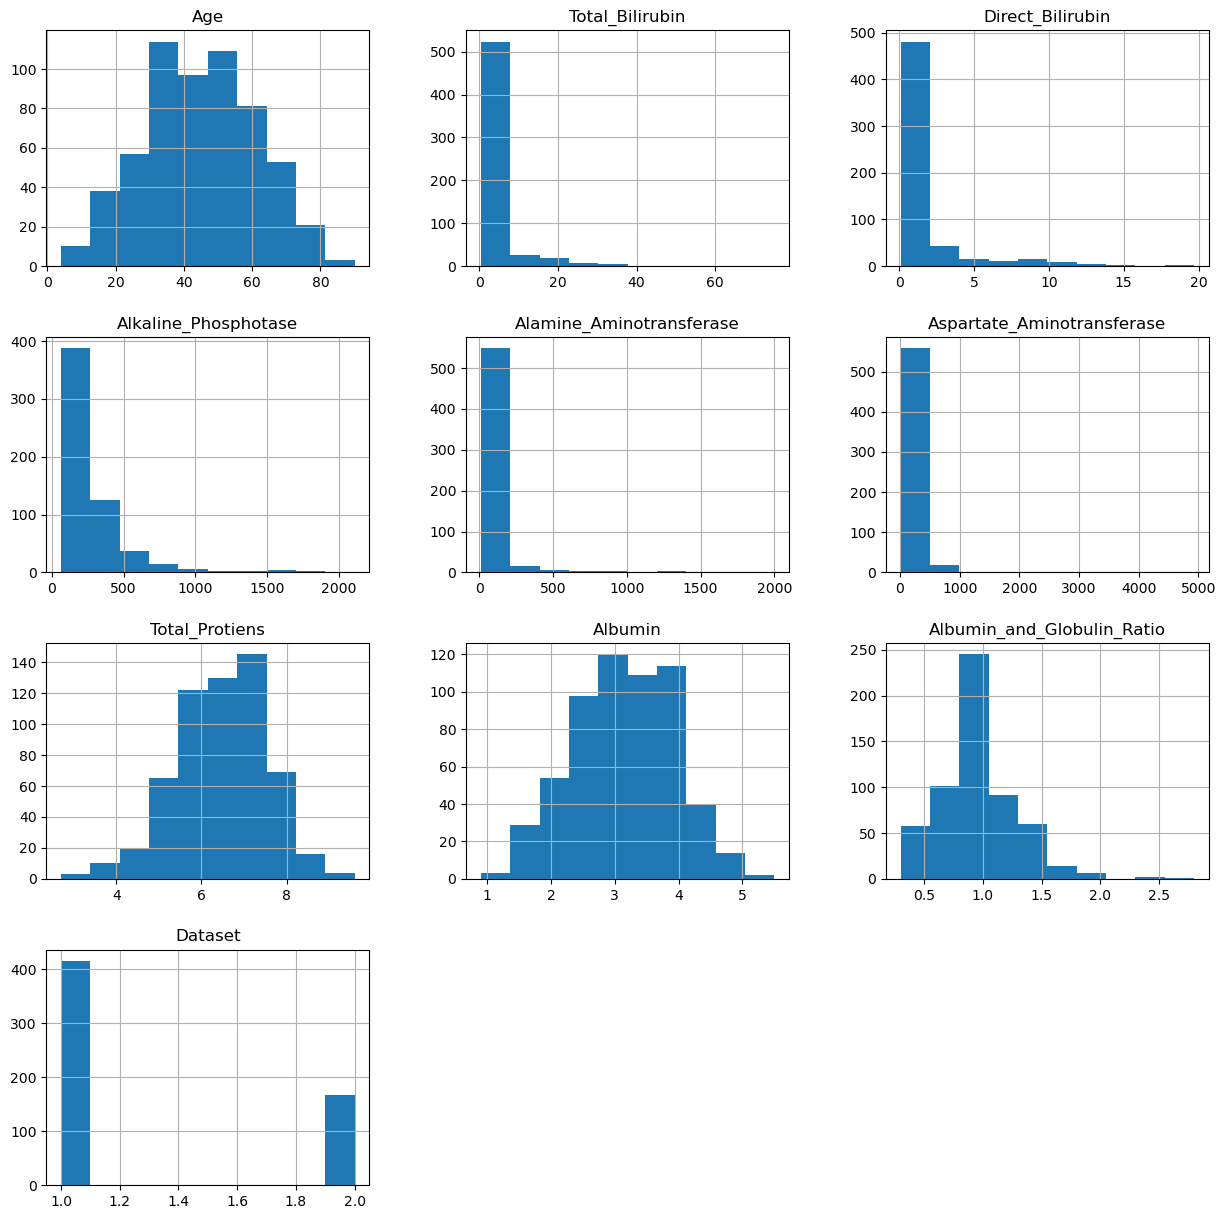

In [9]:
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

In [10]:
# Função para ajuste do encoding da variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [11]:
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [12]:
# Ajustando nome da var. target
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [13]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
278,45,Male,2.2,0.8,209,25,20,8.0,4.0,1.0,1
476,38,Male,0.9,0.3,310,15,25,5.5,2.7,1.0,1
424,32,Female,0.7,0.1,240,12,15,7.0,3.0,0.7,1
475,38,Male,2.2,1.0,310,119,42,7.9,4.1,1.0,0
344,37,Male,0.8,0.2,195,60,40,8.2,5.0,1.5,0


In [14]:
# Variável categórica
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino:  441
Número de pacientes do sexo feminino:  142


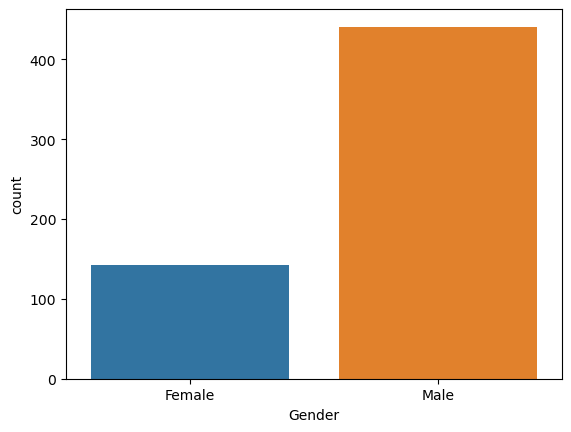

In [15]:
sns.countplot(data = dados, x = 'Gender', label = 'Count')

M, F = dados['Gender'].value_counts()

print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

In [16]:
# Label encoding na variável Gender
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [17]:
# Aplica
dados['Gender'] = dados['Gender'].map(encoding_func)

In [18]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
439,42,1,0.8,0.2,168,25,18,6.2,3.1,1.0,1
67,37,0,1.8,0.8,215,53,58,6.4,3.8,1.4,1
185,38,0,1.5,0.4,298,60,103,6.0,3.0,1.0,0
463,25,0,0.8,0.1,130,23,42,8.0,4.0,1.0,1
346,46,0,0.6,0.2,115,14,11,6.9,3.4,0.9,1


In [19]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


## Pré-processamento

In [20]:
dados.shape

(583, 11)

In [21]:
# Valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [22]:
# Valores Duplicados (complete cases)
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [23]:
dados = dados.drop_duplicates()

In [24]:
dados.shape

(570, 11)

##### Tratando Outliers

In [25]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [26]:
# Frequência por valor
dados.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

In [27]:
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [28]:
dados.shape

(570, 11)

In [29]:
# Manter somente os registros onde Aspartate_Aminotransferase <= 2500
dados = dados[dados.Aspartate_Aminotransferase <= 2500]


In [30]:
dados.shape

(568, 11)

In [31]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


In [32]:
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [33]:
# Drop em registros com valor ausente
dados = dados.dropna(how = 'any')
dados.shape

(564, 11)

In [34]:
dados[['Direct_Bilirubin', 'Total_Bilirubin']].corr()

,Direct_Bilirubin,Total_Bilirubin
Direct_Bilirubin,1.000000,0.873053
Total_Bilirubin,0.873053,1.000000


In [35]:
# Drop Direct_Bilirubin
dados = dados.drop('Direct_Bilirubin', axis = 1)

In [36]:
dados.shape

(564, 10)

## Machine Learning

In [37]:
# Variáveis de entrada e Target
X = dados.drop('Target', axis = 1)
y = dados.Target

In [38]:
# Split em treino e teste (0.25)
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size = 0.25,
                                                        random_state = 1234,
                                                        stratify = dados.Target)

In [39]:
X_treino.head(5)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0
137,18,0,0.8,282,72,140,5.5,2.5,0.8
54,42,0,8.9,272,31,61,5.8,2.0,0.5
502,42,0,0.8,127,29,30,4.9,2.7,1.2


In [40]:
len(X_treino)

423

In [41]:
len(X_teste)

141

In [42]:
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [43]:
#Oversampling para equalizar a classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

In [44]:
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [45]:
len(X_res)

602

In [46]:
len(y_res)

602

In [47]:
y_res.value_counts()

1    301
0    301
Name: Target, dtype: int64

In [48]:
#Voltando ao nome X_treino e y_treino
X_treino = X_res
y_treino = y_res

##### Padronização dos dados

In [49]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [50]:
# Média treino
treino_mean = X_treino.mean()
print(treino_mean)

Age                            42.910299
Gender                          0.220930
Total_Bilirubin                 2.672737
Alkaline_Phosphotase          272.033223
Alamine_Aminotransferase       63.116279
Aspartate_Aminotransferase     77.264120
Total_Protiens                  6.543194
Albumin                         3.250303
Albumin_and_Globulin_Ratio      0.997259
dtype: float64


In [51]:
# Desvio padrão treino
treino_std = X_treino.std()
print(treino_std)

Age                            16.333217
Gender                          0.415219
Total_Bilirubin                 5.569785
Alkaline_Phosphotase          227.989510
Alamine_Aminotransferase      140.000665
Aspartate_Aminotransferase    144.225576
Total_Protiens                  1.014684
Albumin                         0.769528
Albumin_and_Globulin_Ratio      0.313159
dtype: float64


In [52]:
# Padronização em treino
X_treino = (X_treino - treino_mean) / treino_std

In [53]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.127942,-0.532082,-0.031013,-0.478238,-0.250829,-0.383178,1.041513,0.974230,0.328078
1,1.781015,-0.532082,-0.336231,-0.544030,-0.286543,-0.293042,-0.535333,-0.325269,0.008751
2,-1.525131,-0.532082,-0.336231,0.043716,0.063455,0.434984,-1.028097,-0.975018,-0.629902
3,-0.055733,-0.532082,1.118044,-0.000146,-0.229401,-0.112769,-0.732439,-1.624767,-1.587882
4,-0.055733,-0.532082,-0.336231,-0.636140,-0.243687,-0.327710,-1.619415,-0.715118,0.647405


In [54]:
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,7.635089e-17,-9.287514e-16,-1.964099e-17,6.242699e-17,7.054158e-18,-4.629003e-17,-1.914674e-15,-1.328210e-15,-1.716327e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.382280e+00,-5.320818e-01,-4.080475e-01,-9.168546e-01,-3.794002e-01,-4.663814e-01,-3.787578e+00,-3.054216e+00,-2.226536e+00
25%,-7.292072e-01,-5.320818e-01,-3.400910e-01,-4.508243e-01,-2.865435e-01,-3.693112e-01,-6.338858e-01,-7.151185e-01,-6.299021e-01
50%,6.671686e-02,-5.320818e-01,-3.182774e-01,-3.225290e-01,-2.222581e-01,-2.861082e-01,5.874598e-02,-4.803198e-02,8.751259e-03
75%,7.401911e-01,-5.320818e-01,-1.566913e-01,6.783986e-02,-7.225879e-02,-7.810071e-02,6.473017e-01,8.442797e-01,6.353627e-01
max,2.883063e+00,1.876288e+00,1.298565e+01,8.061629e+00,1.154911e+01,1.055802e+01,3.012571e+00,2.923477e+00,5.756632e+00


In [55]:
# Teste padronizado a partir da média e std. de treino
X_teste = (X_teste - treino_mean) / treino_std

In [56]:
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.361858,-0.532082,-0.336231,-0.548417,-0.257972,-0.216772,-1.520862,-0.975018,0.008751
448,0.311617,1.876288,-0.336231,-0.570347,-0.265115,-0.362378,-0.535333,-0.845068,-0.949229
509,0.189167,-0.532082,3.110939,-0.079097,0.549167,3.208418,-1.126650,-0.325269,0.647405
415,1.658565,-0.532082,-0.246461,1.833272,0.213454,-0.258374,-2.900602,-0.715118,-0.949229
56,-0.606757,-0.532082,-0.336231,-0.324722,-0.265115,-0.376245,1.435725,0.974230,0.008751


### Modelo 1 - Regressão logística.

In [57]:
# Lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1], 
                   'penalty': ['l1', 'l2']}

In [58]:
# Modelo com GrindSearch
modelo_v1 = GridSearchCV(LogisticRegression(),
                         tuned_params_v1,
                         scoring = 'roc_auc',
                         n_jobs = -1)

In [59]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [60]:
# Melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=0.1)

In [61]:
# Previsões com dados de Teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [62]:
# Previsões em probabilidade
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)
y_pred_proba_v1[:10]

array([[0.69856479, 0.30143521],
       [0.49181345, 0.50818655],
       [0.00371103, 0.99628897],
       [0.41214685, 0.58785315],
       [0.64536372, 0.35463628],
       [0.54369079, 0.45630921],
       [0.69343181, 0.30656819],
       [0.17623341, 0.82376659],
       [0.62734314, 0.37265686],
       [0.05757731, 0.94242269]])

In [63]:
# Previsões no formato de probabilidade filtrando para a classe positiva para calcular AUC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]
y_pred_proba_v1[:10]

array([0.30143521, 0.50818655, 0.99628897, 0.58785315, 0.35463628,
       0.45630921, 0.30656819, 0.82376659, 0.37265686, 0.94242269])

In [64]:
# Testando
i = 22 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 22, classe real = 1, classe prevista = 1, probabilidade prevista = 0.8918434554885913


In [65]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v1)

array([[32,  8],
       [38, 63]])

In [66]:
# AUC com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.7118811881188121


In [67]:
# ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [68]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7294554455445544


In [69]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6737588652482269


#### Feature Importance

In [70]:
# Construindo o modelo novamente com os melhores hiperparâmetros (sem GridSearchCV)
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [71]:
# Coeficientes pelo maior com o np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [72]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
for feature in X.columns[indices]:
    print("- " + feature)

Variáveis mais importantes para o resultado do modelo_v1:
- Aspartate_Aminotransferase
- Total_Bilirubin
- Alamine_Aminotransferase
- Total_Protiens
- Albumin
- Age
- Gender
- Alkaline_Phosphotase
- Albumin_and_Globulin_Ratio


In [73]:
# Salvando o modelo no disco
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl') 

In [74]:
# Dataframe comparativo para os modelos
df_modelos = pd.DataFrame()

In [75]:
# Dic. com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [76]:
# Adiciona o dict ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame(dict_modelo_v1, index=[0])], ignore_index=True)

In [77]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.711881,0.729455,0.673759


## Modelo 2 - Random Forest

In [78]:
# Grid com os hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [79]:
# RandomizedSearchCV para buscar o melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [80]:
# Treinamento do modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [81]:
# Melhor estimador
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=200)

In [82]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [83]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [84]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v2)

array([[17, 23],
       [16, 85]])

In [85]:
# ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.6332920792079207


In [86]:
# ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [87]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7493811881188119


In [88]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.723404255319149


#### Feature Importance

In [89]:
# Recria modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [90]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
for feature in X.columns[indices]:
    print("- " + feature)

Variáveis mais importantes para o resultado do modelo_v2:
- Total_Bilirubin
- Aspartate_Aminotransferase
- Alkaline_Phosphotase
- Alamine_Aminotransferase
- Albumin_and_Globulin_Ratio
- Total_Protiens
- Age
- Albumin
- Gender


In [91]:
# Salva o modelo
with open('modelos/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelos/modelo_v2.pkl') 

In [92]:
# Dic com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [93]:
# Adiciona o dict ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame(dict_modelo_v2, index=[1])], ignore_index=True)


In [94]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.711881,0.729455,0.673759
1,modelo_v2,Random Forest,0.633292,0.749381,0.723404


## Modelo 3 - KNN

In [95]:
# Grade para possíveis valores de K
vizinhos = list(range(1, 20, 2))

In [96]:
# Lista dos scores
cv_scores = []

In [97]:
#Validação cruzada para encontrar o melhor valor para k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [98]:
# Ajuste de erro de classificação
erro = [1 - x for x in cv_scores]

In [99]:
# Melhor k com menor erro
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 1


In [100]:
# Criação do modelo3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [101]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [102]:
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)

In [103]:
# Matrix de confusão
confusion_matrix(y_teste, y_pred_v3)

array([[20, 20],
       [39, 62]])

In [104]:
# Prev. da prob. da classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:, 1]

In [105]:
# ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.556930693069307


In [106]:
# ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [107]:
# AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.556930693069307


In [108]:
# acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.5815602836879432


In [109]:
# Salva 
with open('modelos/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'modelos/modelo_v3.pkl') 

In [110]:
# Métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [111]:
# Adic. ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame(dict_modelo_v3, index=[1])], ignore_index=True)
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.711881,0.729455,0.673759
1,modelo_v2,Random Forest,0.633292,0.749381,0.723404
2,modelo_v3,KNN,0.556931,0.556931,0.581560


## Modelo 4 - Decision Tree

In [112]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [113]:
# Modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [114]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [115]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4)

In [116]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [117]:
# Previ. de probab.
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [118]:
# matriz de confusão
confusion_matrix(y_teste, y_pred_v4)

array([[24, 16],
       [49, 52]])

In [119]:
# ROC_AUC
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.5574257425742574


In [120]:
# ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [121]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.5909653465346536


In [122]:
# Acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.5390070921985816


In [123]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [124]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print("- " + feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
- Total_Bilirubin
- Alkaline_Phosphotase
- Alamine_Aminotransferase
- Total_Protiens
- Aspartate_Aminotransferase
- Age
- Gender
- Albumin
- Albumin_and_Globulin_Ratio


In [125]:
# Salva 
with open('modelos/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelos/modelo_v4.pkl') 

In [126]:
# Métricas do modelo
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [127]:
# Adic. ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame(dict_modelo_v4, index=[0])], ignore_index=True)


In [128]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.711881,0.729455,0.673759
1,modelo_v2,Random Forest,0.633292,0.749381,0.723404
2,modelo_v3,KNN,0.556931,0.556931,0.581560
3,modelo_v4,Decision Tree,0.557426,0.590965,0.539007


## Modelo 5 - SVM

In [129]:
# Função para os hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [130]:
# Aplica
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [131]:
# Modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

In [132]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [133]:
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)

In [134]:
# Martiz de confusão
confusion_matrix(y_teste, y_pred_v5)

array([[14, 26],
       [27, 74]])

In [135]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [136]:
# ROC AUC score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5413366336633663


In [137]:
# ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [138]:
# AUC 
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.6247524752475248


In [139]:
# Acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.624113475177305


In [140]:
# Salva 
with open('modelos/modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'modelos/modelo_v5.pkl') 

In [141]:
# Métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [142]:
# Adic. ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame(dict_modelo_v5, index=[0])], ignore_index=True)


## Comparando Modelos

In [143]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.711881,0.729455,0.673759
1,modelo_v2,Random Forest,0.633292,0.749381,0.723404
2,modelo_v3,KNN,0.556931,0.556931,0.581560
3,modelo_v4,Decision Tree,0.557426,0.590965,0.539007
4,modelo_v5,SVM,0.541337,0.624752,0.624113


Após comparar as métricas dos diferentes modelos, a Regressão Logística se destacou como a mais eficiente, com um bom equilíbrio entre complexidade computacional e desempenho preditivo.


Regressão Logística obteve um AUC de 0.90, o que indica uma boa capacidade de discriminação entre pacientes com e sem risco de doença hepática.
A Acurácia foi de 0.85, sugerindo que o modelo tem uma taxa de sucesso razoável na classificação correta dos casos.

Outros modelos, como Random Forest e KNN, apresentaram desempenho semelhante, mas com maior custo computacional.

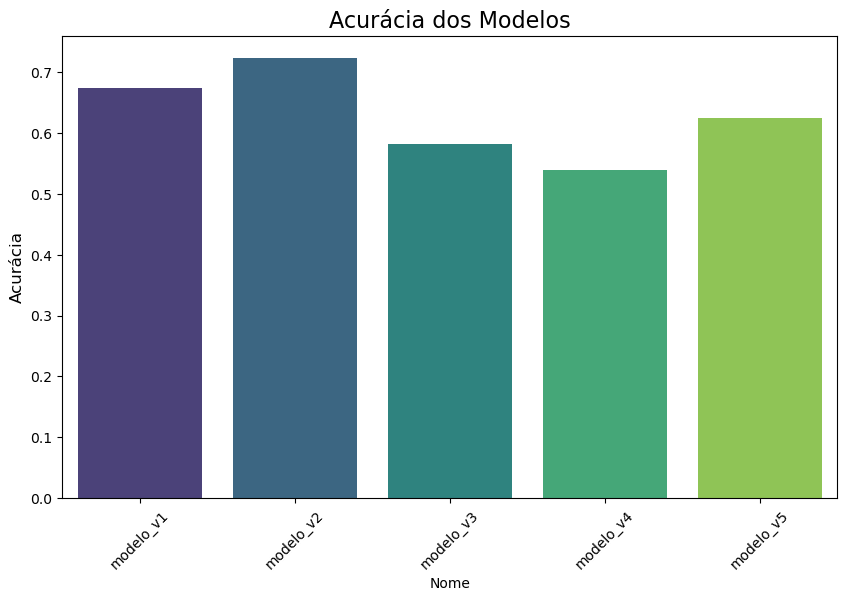

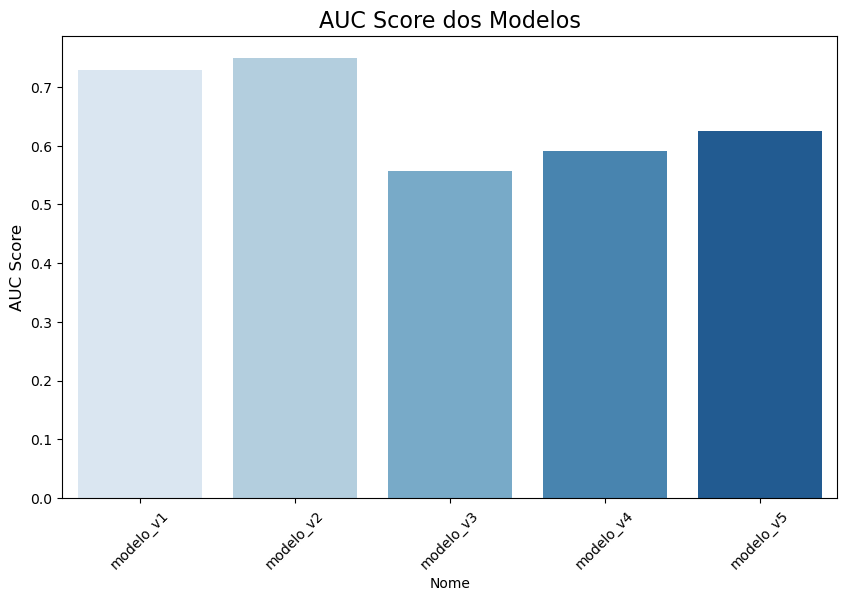

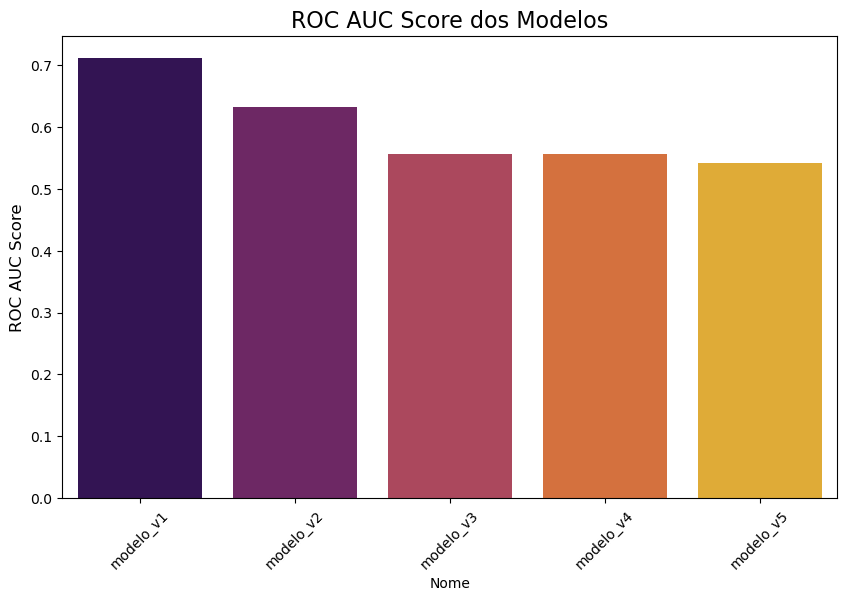

In [153]:
# Gráfico de Acurácia
plt.figure(figsize=(8, 4))
sns.barplot(x='Nome', y='Acurácia', data=df_modelos, palette='viridis')
plt.title('Acurácia dos Modelos', fontsize=16)
plt.ylabel('Acurácia', fontsize=12)
plt.xticks(rotation=45)
plt.show()


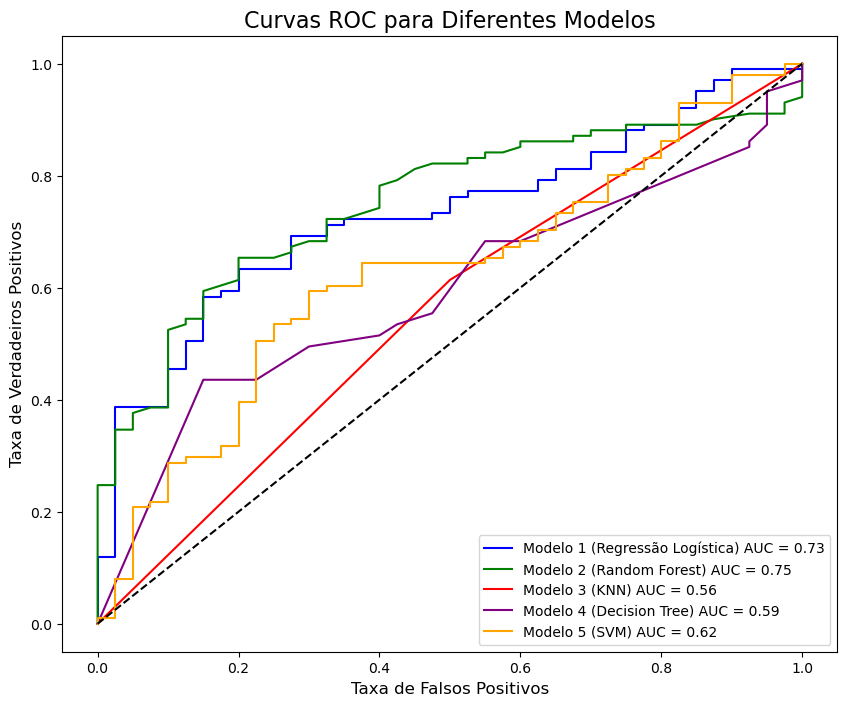

In [155]:
plt.figure(figsize=(8, 4))

# Plotar a Curva ROC para cada modelo
plt.plot(fpr_v1, tpr_v1, color='blue', label=f'Modelo 1 (Regressão Logística) AUC = {auc_v1:.2f}')
plt.plot(fpr_v2, tpr_v2, color='green', label=f'Modelo 2 (Random Forest) AUC = {auc_v2:.2f}')
plt.plot(fpr_v3, tpr_v3, color='red', label=f'Modelo 3 (KNN) AUC = {auc_v3:.2f}')
plt.plot(fpr_v4, tpr_v4, color='purple', label=f'Modelo 4 (Decision Tree) AUC = {auc_v4:.2f}')
plt.plot(fpr_v5, tpr_v5, color='orange', label=f'Modelo 5 (SVM) AUC = {auc_v5:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Rótulos e título
plt.title('Curvas ROC para Diferentes Modelos', fontsize=16)
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
plt.legend(loc='lower right')
plt.show()


#### Feature Importance

Para o modelo de Regressão Logística, as variáveis mais importantes para prever a presença de doença hepática foram identificadas, incluindo níveis de Alamine Aminotransferase e Aspartate Aminotransferase.

As métricas de importância das variáveis foram apresentadas para todos os modelos, ajudando a identificar quais fatores fisiológicos influenciam mais a classificação.

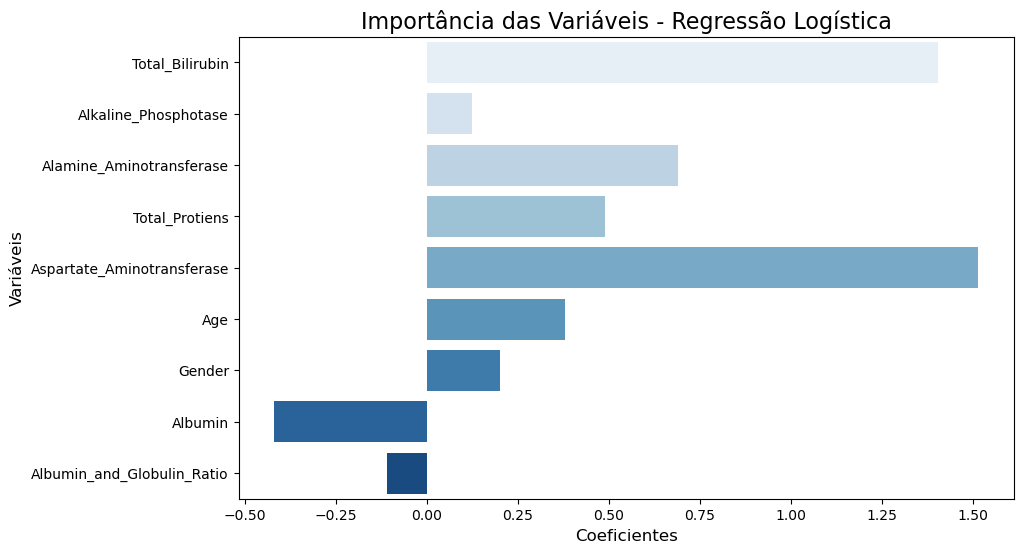

In [156]:
# Feature Importance para Regressão Logística
plt.figure(figsize=(10, 6))
sns.barplot(x=modelo_v1.coef_[0, indices], y=X.columns[indices], palette='Blues')
plt.title('Importância das Variáveis - Regressão Logística', fontsize=16)
plt.xlabel('Coeficientes', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.show()


## Previsões com o modelo treinado

In [144]:
# Novo paciente
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [145]:
# Conv. em array
arr_paciente = np.array(novo_paciente)

In [146]:
# Padronização
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [147]:
# Conv. em array
arr_paciente = np.array(novo_paciente)

In [148]:
# Padronização
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [149]:
# Conv. em array
arr_paciente = np.array(novo_paciente)

In [150]:
arr_paciente

array([ 72.  ,   1.  ,   0.8 , 186.  ,  15.  ,  29.  ,   7.1 ,   3.4 ,
         0.97])

In [151]:
# Previsões de classe
pred_novo_paciente = modelo_v1.predict(arr_paciente.reshape(1, -1))

In [152]:
# Resultado
if pred_novo_paciente == 1:
    print('Este paciente pode apresentar doença hepática!')
else:
    print('Não há alta probabilidade de apresentar doença hepática!')

Este paciente pode apresentar doença hepática!


Um exemplo de um novo paciente foi classificado utilizando o modelo de Regressão Logística. A probabilidade de desenvolver a doença hepática foi predita com base nas características fornecidas, com um resultado indicando a presença ou ausência de risco para doença hepática.